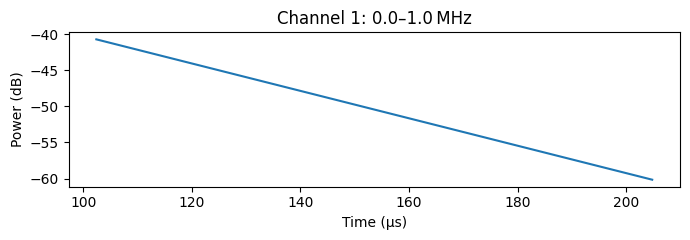

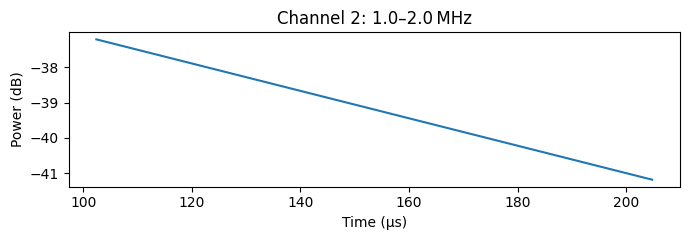

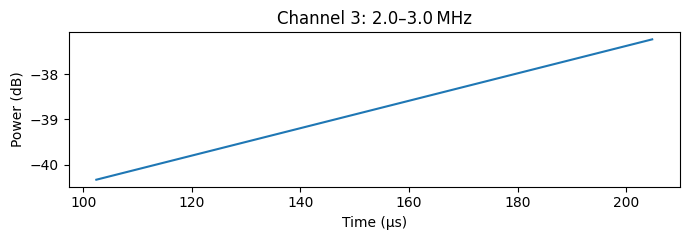

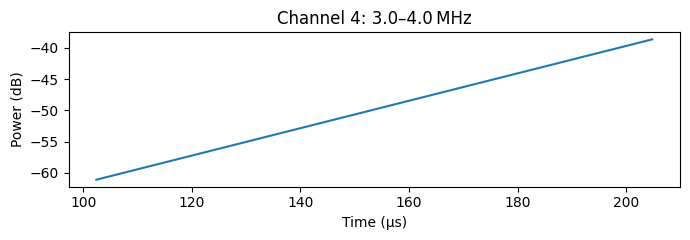

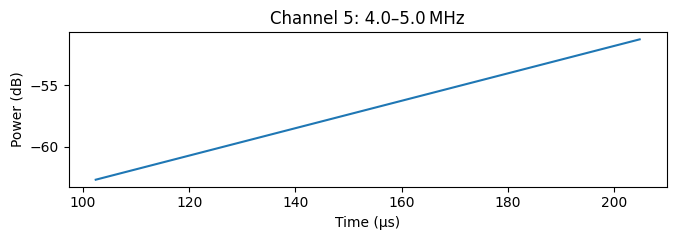

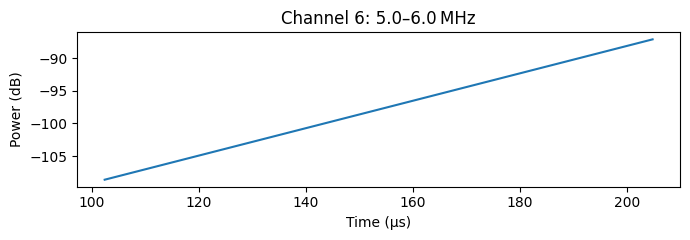

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# --------------------------------------------------
# 1. 신호 생성 (이전 예시와 동일 구조, 10 MHz 샘플)
# --------------------------------------------------
fs = 10_000_000        # 10 MHz sampling rate
duration = 400e-6      # 400 µs
t = np.linspace(0, duration, int(fs * duration))

# 시간‑가변 주파수 톤 시퀀스 (20 슬롯)
signal = np.zeros_like(t)
frequencies = np.linspace(0.5e6, 5.5e6, 20)  # 0.5 MHz → 5.5 MHz

np.random.seed(0)
for i, f in enumerate(frequencies):
    start_time = i * (duration / len(frequencies))
    end_time = start_time + (duration / 5)
    mask = (t >= start_time) & (t <= end_time)
    signal[mask] += np.sin(2 * np.pi * f * t[mask])

# AWGN 추가 (SNR ≈ 10 dB)
signal += 0.1 * np.random.randn(len(t))

# --------------------------------------------------
# 2. 스펙트로그램 계산
# --------------------------------------------------
f, t_spec, Sxx = spectrogram(signal, fs=fs, nperseg=2048, noverlap=1024)
# Sxx: shape (frequency_bins, time_bins)

# --------------------------------------------------
# 3. 채널라이저: 0–6 MHz 대역을 6 채널로 균등 분할
# --------------------------------------------------
num_channels = 6
band_edges = np.linspace(0, 6e6, num_channels + 1)  # [0,1,2,…,6] MHz
channel_power = []

for ch in range(num_channels):
    low_f = band_edges[ch]
    high_f = band_edges[ch + 1]
    band_mask = (f >= low_f) & (f < high_f)
    # 시간축 전력 합산 → channel power vs time
    pwr = np.sum(Sxx[band_mask, :], axis=0)
    channel_power.append(10 * np.log10(pwr + 1e-12))  # dB로 변환

# --------------------------------------------------
# 4. 채널별 전력 시계열 플롯 (각 채널당 하나의 차트)
# --------------------------------------------------
for ch in range(num_channels):
    plt.figure(figsize=(7, 2.5))
    plt.plot(t_spec * 1e6, channel_power[ch])
    plt.xlabel("Time (µs)")
    plt.ylabel("Power (dB)")
    plt.title(f"Channel {ch+1}: {band_edges[ch]/1e6:.1f}–{band_edges[ch+1]/1e6:.1f} MHz")
    plt.tight_layout()
    plt.show()


In [5]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 1.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.2/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


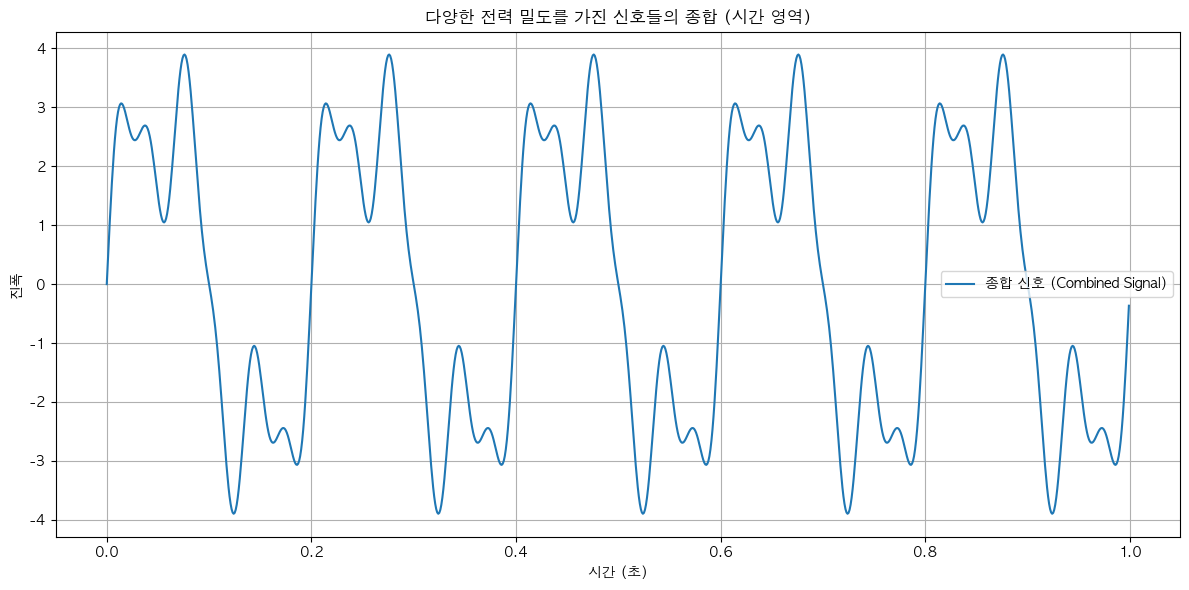

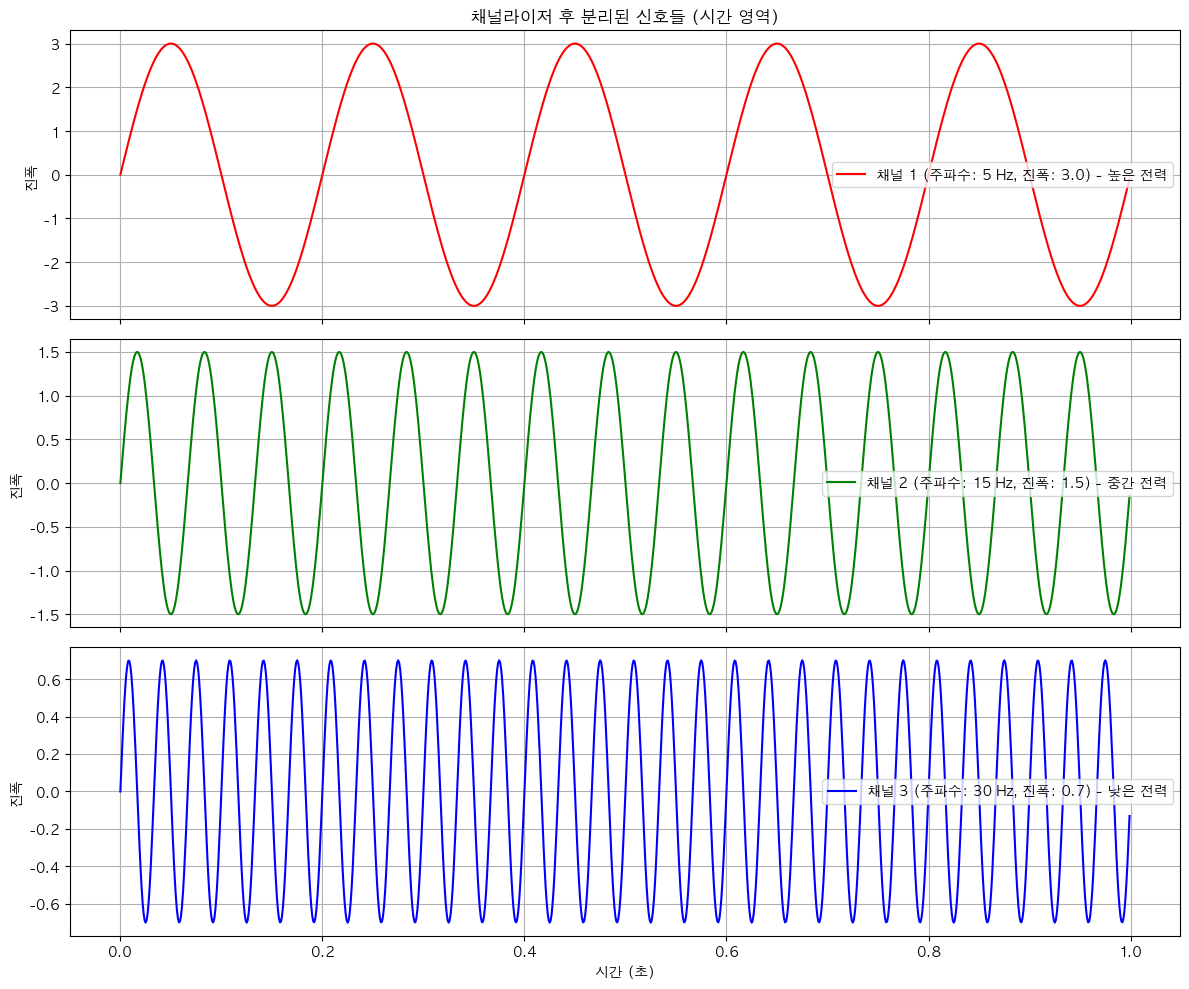

시간 영역에서의 종합 신호 및 각 채널별 신호 플롯이 생성되었습니다.
combined_signal_time_domain.png 파일과 channelized_signals_time_domain.png 파일로 저장되었습니다.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 예시, 다른 OS의 경우 경로 수정 필요)
# plt.rcParams['font.family'] = 'Malgun Gothic'
# macOS의 경우
plt.rcParams['font.family'] = 'AppleGothic'
# Linux의 경우, 나눔고딕 등 설치 후
# plt.rcParams['font.family'] = 'NanumGothic'
# 해당 폰트가 없는 경우, 기본 영문 폰트로 표시됩니다.
# 또는, 특정 폰트 파일을 직접 지정할 수도 있습니다.
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 예시 경로
# font_prop = fm.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()

plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

# 시간 파라미터 설정
sampling_rate = 1000  # 샘플링 주파수 (Hz)
duration = 1.0        # 신호 지속 시간 (초)
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False) # 시간 벡터

# 신호 파라미터 (주파수 및 진폭)
# 진폭 (Amplitude)이 전력 밀도를 나타냄 (Power ~ Amplitude^2)
amp1, freq1 = 3.0, 5   # 신호 1: 높은 전력, 낮은 주파수
amp2, freq2 = 1.5, 15  # 신호 2: 중간 전력, 중간 주파수
amp3, freq3 = 0.7, 30  # 신호 3: 낮은 전력, 높은 주파수

# 각 신호 생성
signal1 = amp1 * np.sin(2 * np.pi * freq1 * t)
signal2 = amp2 * np.sin(2 * np.pi * freq2 * t)
signal3 = amp3 * np.sin(2 * np.pi * freq3 * t)

# 모든 신호를 합한 종합 신호
combined_signal = signal1 + signal2 + signal3

# 1. 종합 신호 플롯
plt.figure(figsize=(12, 6))
plt.plot(t, combined_signal, label='종합 신호 (Combined Signal)')
plt.title('다양한 전력 밀도를 가진 신호들의 종합 (시간 영역)')
plt.xlabel('시간 (초)')
plt.ylabel('진폭')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("combined_signal_time_domain.png")
plt.show()

# 2. 채널라이저를 통해 분리된 각 채널 플롯
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# 채널 1 (원래 신호 1)
axs[0].plot(t, signal1, color='r', label=f'채널 1 (주파수: {freq1} Hz, 진폭: {amp1}) - 높은 전력')
axs[0].set_title('채널라이저 후 분리된 신호들 (시간 영역)')
axs[0].set_ylabel('진폭')
axs[0].legend()
axs[0].grid(True)

# 채널 2 (원래 신호 2)
axs[1].plot(t, signal2, color='g', label=f'채널 2 (주파수: {freq2} Hz, 진폭: {amp2}) - 중간 전력')
axs[1].set_ylabel('진폭')
axs[1].legend()
axs[1].grid(True)

# 채널 3 (원래 신호 3)
axs[2].plot(t, signal3, color='b', label=f'채널 3 (주파수: {freq3} Hz, 진폭: {amp3}) - 낮은 전력')
axs[2].set_ylabel('진폭')
axs[2].set_xlabel('시간 (초)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.savefig("channelized_signals_time_domain.png")
plt.show()

print("시간 영역에서의 종합 신호 및 각 채널별 신호 플롯이 생성되었습니다.")
print("combined_signal_time_domain.png 파일과 channelized_signals_time_domain.png 파일로 저장되었습니다.")

/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/3365084033.py:63: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from font(s) AppleGothic.
  plt.tight_layout()
/opt/homebrew/Cellar/jupyterlab/4.3.2/libexec/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


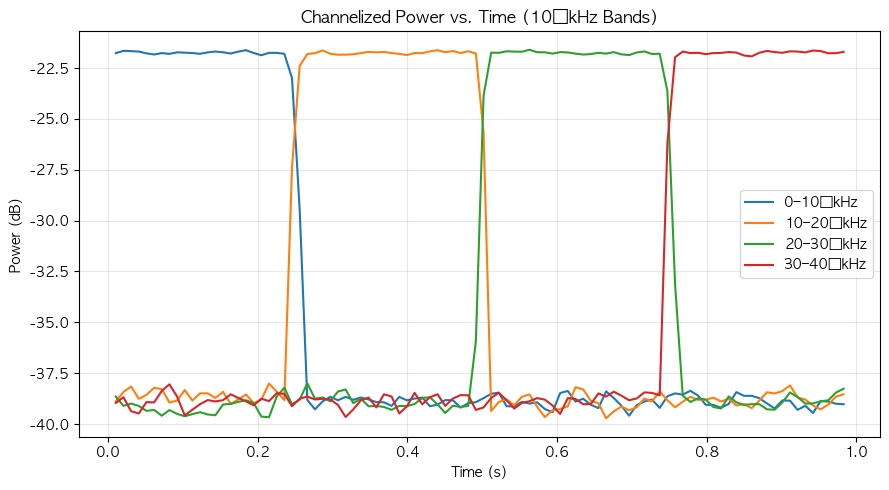

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# -------------------------------------------------------
# 1) Re‑create the synthetic time‑varying multitone signal
# -------------------------------------------------------
fs = 100_000            # 100 kHz sampling rate
duration = 1.0          # 1 s
t = np.arange(0, duration, 1 / fs)

slots = [
    (0.00, 0.25, 5_000),
    (0.25, 0.50, 15_000),
    (0.50, 0.75, 25_000),
    (0.75, 1.00, 35_000),
]

signal = np.zeros_like(t)
for start, end, freq in slots:
    idx = (t >= start) & (t < end)
    phase = 2 * np.pi * np.random.rand()
    signal[idx] = 0.8 * np.cos(2 * np.pi * freq * t[idx] + phase)

# Add AWGN (≈ 10 dB SNR)
snr_db = 10
sig_pow = np.mean(signal ** 2)
noise_pow = sig_pow / (10 ** (snr_db / 10))
rx_signal = signal + np.random.normal(0, np.sqrt(noise_pow), size=t.shape)

# -------------------------------------------------------
# 2) Spectrogram and simple energy‑based channelizer
#    • Split 0–40 kHz into 4× 10 kHz channels
# -------------------------------------------------------
nfft = 2048
noverlap = nfft // 2
f_bins, t_bins, Sxx = spectrogram(rx_signal, fs=fs, nperseg=nfft, noverlap=noverlap)

# Channel definitions (Hz)
chan_edges = np.array([0, 10_000, 20_000, 30_000, 40_000])
num_ch = len(chan_edges) - 1

# Compute power vs. time per channel
channel_power_db = []
for ch in range(num_ch):
    mask = (f_bins >= chan_edges[ch]) & (f_bins < chan_edges[ch + 1])
    power_lin = np.sum(Sxx[mask, :], axis=0)
    channel_power_db.append(10 * np.log10(power_lin + 1e-12))

# -------------------------------------------------------
# 3) Plot channelized power
# -------------------------------------------------------
plt.figure(figsize=(9, 5))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for ch in range(num_ch):
    plt.plot(t_bins, channel_power_db[ch], color=colors[ch],
             label=f'{chan_edges[ch]/1e3:.0f}–{chan_edges[ch+1]/1e3:.0f} kHz')
plt.xlabel('Time (s)')
plt.ylabel('Power (dB)')
plt.title('Channelized Power vs. Time (10 kHz Bands)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


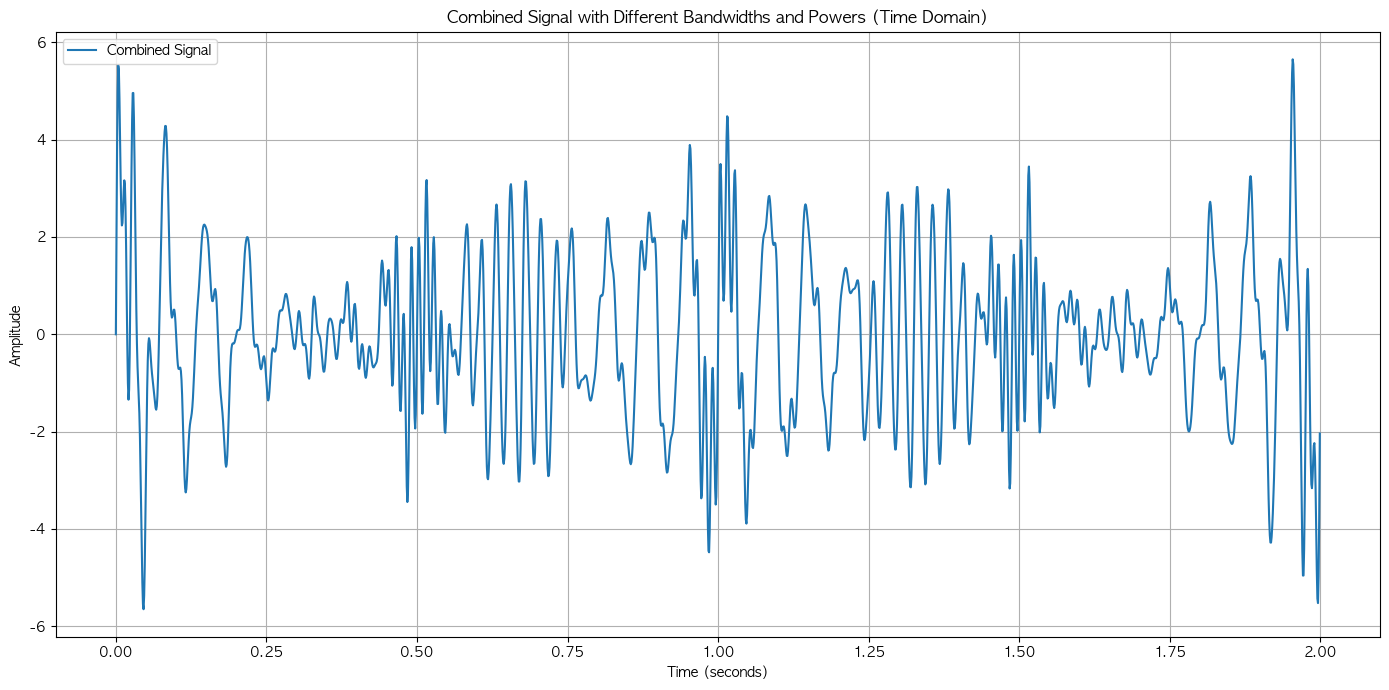

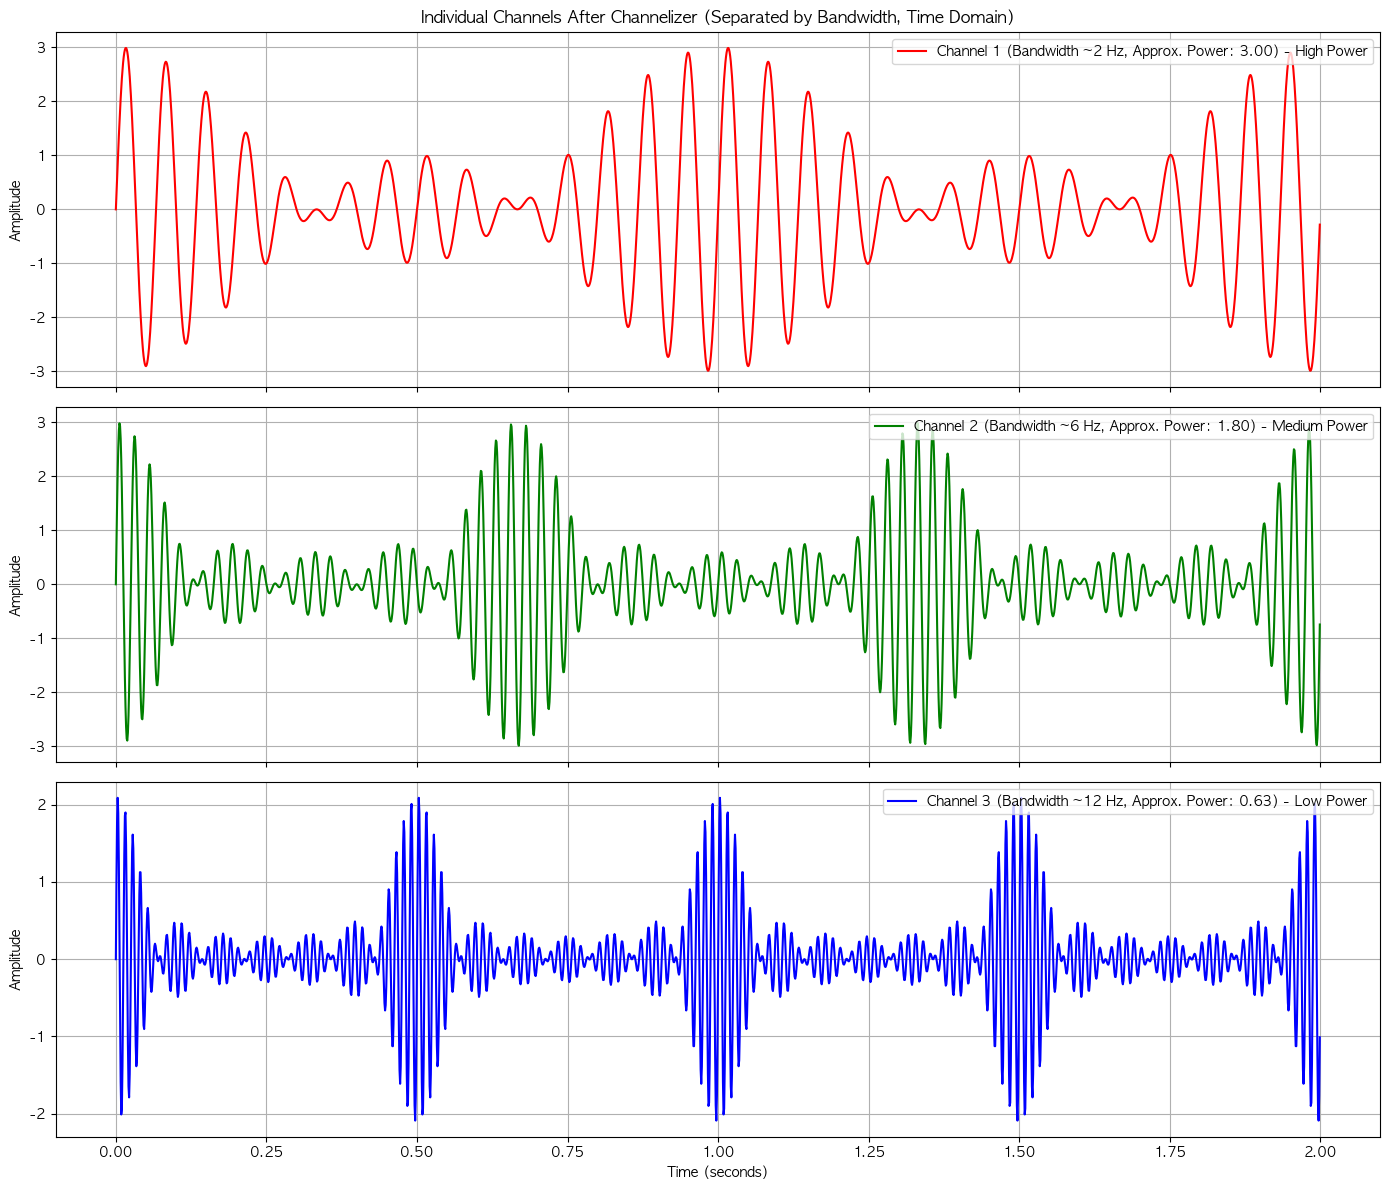

Time-domain plots of signals with different bandwidths have been generated.
Saved as combined_signal_bandwidth_time_domain_en.png and channelized_signals_bandwidth_time_domain_en.png.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# This setting is generally good for ensuring minus signs render correctly.
plt.rcParams['axes.unicode_minus'] = False

# Time parameters
sampling_rate = 1000  # Sampling rate (Hz)
duration = 2.0        # Signal duration (seconds)
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False) # Time vector

# Function to create a band signal by summing multiple sinusoids
def create_band_signal(time_vector, freqs, amps):
    signal = np.zeros_like(time_vector)
    if isinstance(amps, (int, float)): # If a single amplitude value is provided for all components
        amps = [amps] * len(freqs)
    for freq, amp in zip(freqs, amps):
        signal += amp * np.sin(2 * np.pi * freq * time_vector)
    return signal

# Channel 1: Narrow Bandwidth, High Power
freqs1 = [14, 15, 16]  # Frequencies for Channel 1 (Center ~15Hz, Bandwidth ~2Hz)
amps1 = 1.0            # Amplitude for each component in Channel 1 (High Power)
channel1_signal = create_band_signal(t, freqs1, amps1)
# Approximate power is proportional to the sum of squares of amplitudes
power1_approx = len(freqs1) * (amps1**2)

# Channel 2: Medium Bandwidth, Medium Power
freqs2 = [37, 38.5, 40, 41.5, 43]  # Frequencies for Channel 2 (Center ~40Hz, Bandwidth ~6Hz)
amps2 = 0.6                         # Amplitude for each component in Channel 2 (Medium Power)
channel2_signal = create_band_signal(t, freqs2, amps2)
power2_approx = len(freqs2) * (amps2**2)

# Channel 3: Wide Bandwidth, Low Power
freqs3 = [74, 76, 78, 80, 82, 84, 86]  # Frequencies for Channel 3 (Center ~80Hz, Bandwidth ~12Hz)
amps3 = 0.3                           # Amplitude for each component in Channel 3 (Low Power)
channel3_signal = create_band_signal(t, freqs3, amps3)
power3_approx = len(freqs3) * (amps3**2)

# Combined signal from all channels
combined_signal = channel1_signal + channel2_signal + channel3_signal

# 1. Plot Combined Signal
plt.figure(figsize=(14, 7))
plt.plot(t, combined_signal, label='Combined Signal')
plt.title('Combined Signal with Different Bandwidths and Powers (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("combined_signal_bandwidth_time_domain_en.png")
plt.show()

# 2. Plot Individual Channels After Channelizer
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Channel 1
axs[0].plot(t, channel1_signal, color='r', label=f'Channel 1 (Bandwidth ~{freqs1[-1]-freqs1[0]} Hz, Approx. Power: {power1_approx:.2f}) - High Power')
axs[0].set_title('Individual Channels After Channelizer (Separated by Bandwidth, Time Domain)')
axs[0].set_ylabel('Amplitude')
axs[0].legend(loc='upper right')
axs[0].grid(True)

# Channel 2
axs[1].plot(t, channel2_signal, color='g', label=f'Channel 2 (Bandwidth ~{freqs2[-1]-freqs2[0]} Hz, Approx. Power: {power2_approx:.2f}) - Medium Power')
axs[1].set_ylabel('Amplitude')
axs[1].legend(loc='upper right')
axs[1].grid(True)

# Channel 3
axs[2].plot(t, channel3_signal, color='b', label=f'Channel 3 (Bandwidth ~{freqs3[-1]-freqs3[0]} Hz, Approx. Power: {power3_approx:.2f}) - Low Power')
axs[2].set_ylabel('Amplitude')
axs[2].set_xlabel('Time (seconds)')
axs[2].legend(loc='upper right')
axs[2].grid(True)

plt.tight_layout()
plt.savefig("channelized_signals_bandwidth_time_domain_en.png")
plt.show()

print("Time-domain plots of signals with different bandwidths have been generated.")
print("Saved as combined_signal_bandwidth_time_domain_en.png and channelized_signals_bandwidth_time_domain_en.png.")

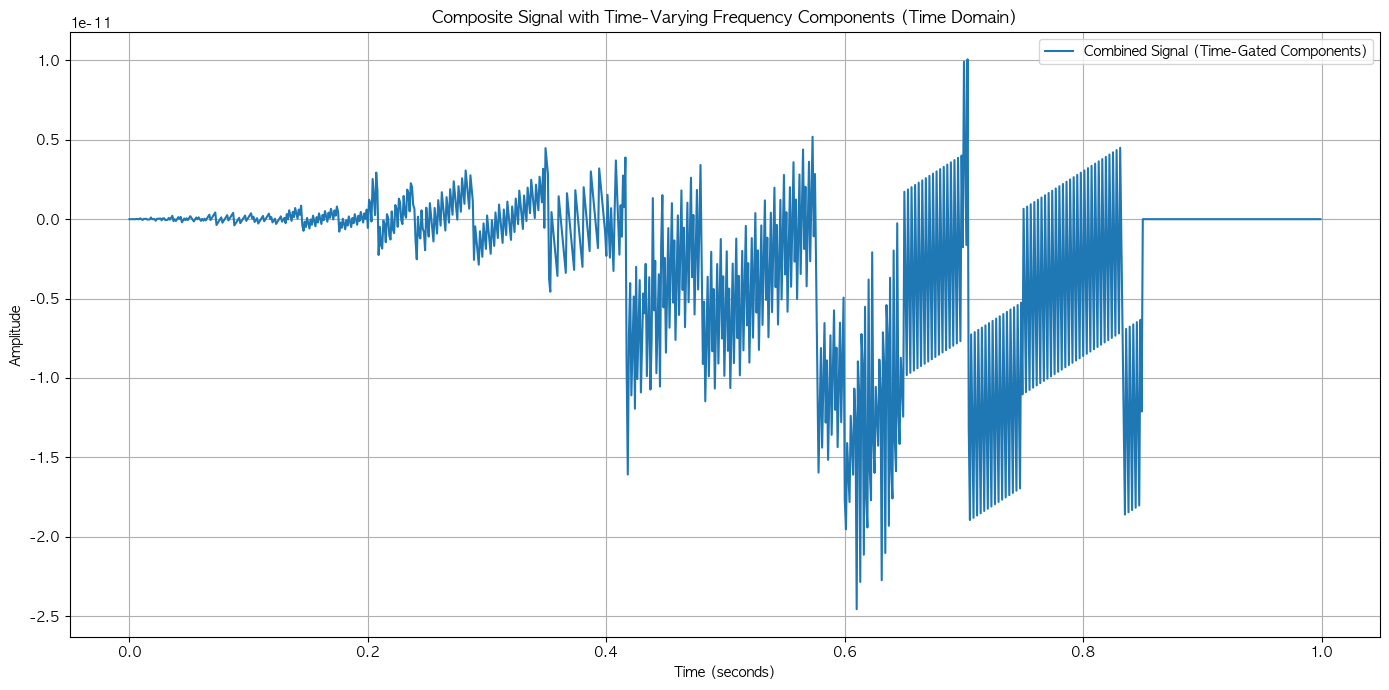

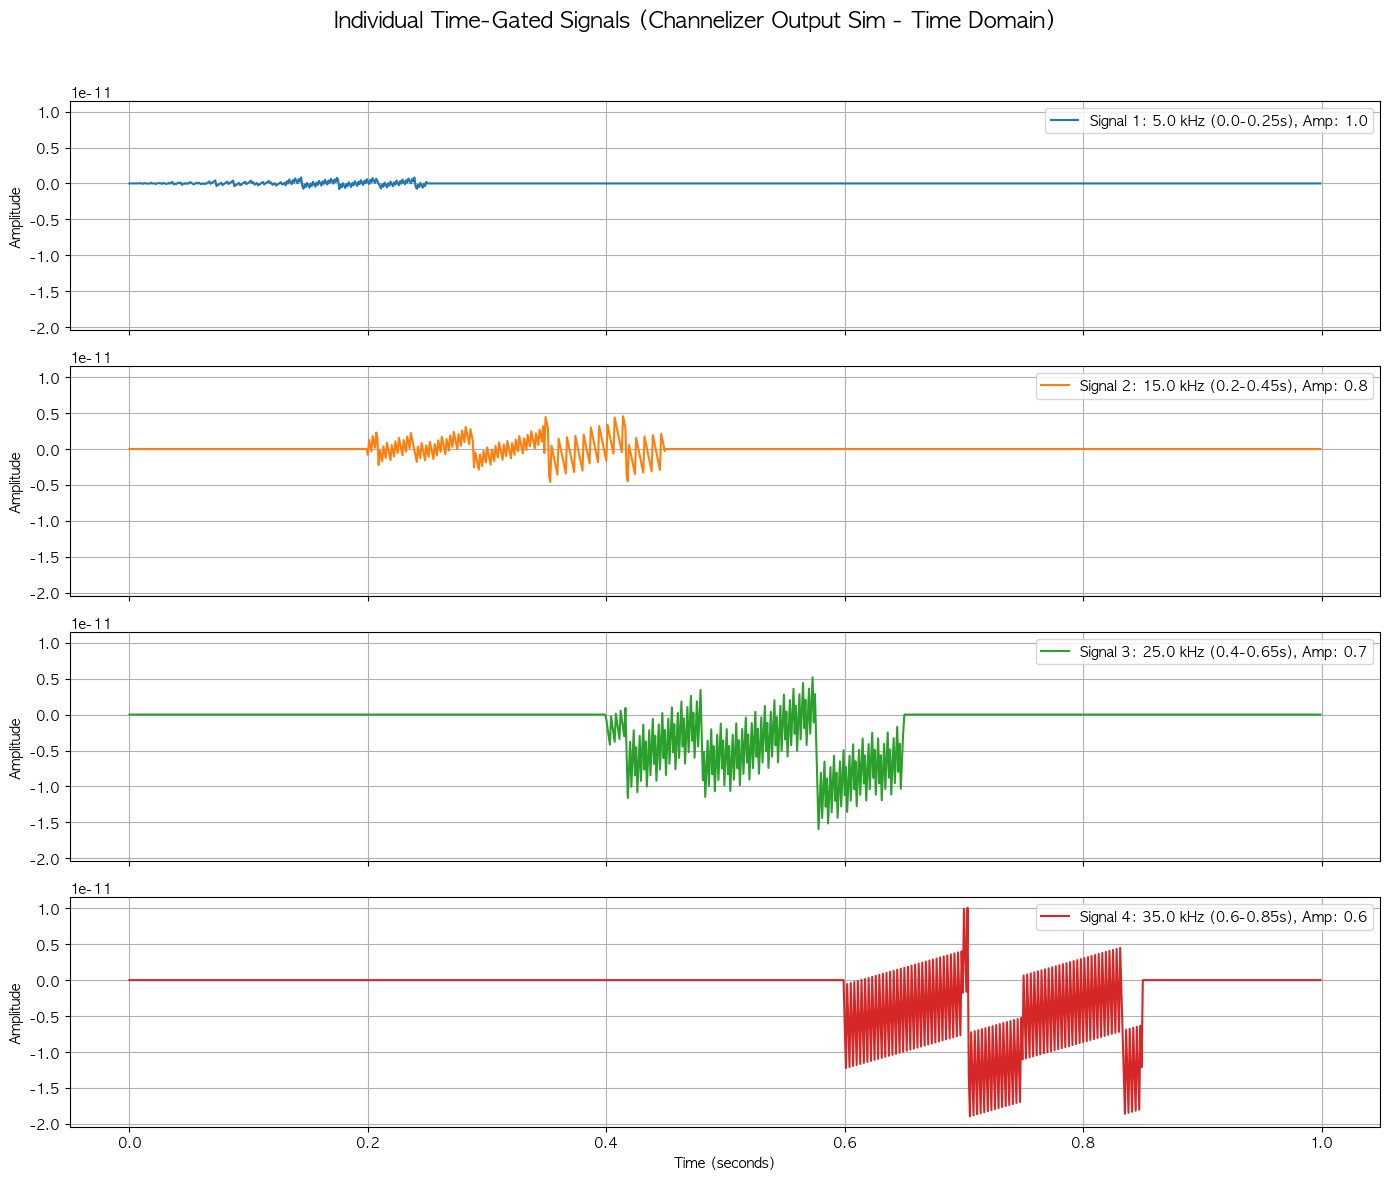

Time-domain plots for signals with time-gated frequency components have been generated.
Saved as combined_signal_time_gated_en.png and channelized_signals_time_gated_en.png.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

# Time parameters
sampling_rate = 1000  # Sampling rate (Hz), to handle frequencies up to ~50kHz
duration = 1.0          # Signal duration (seconds)
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False) # Time vector

# Function to generate a sine wave active only in a specific time window
def generate_gated_sine(time_vector, freq, amp, start_time, end_time, sampling_rate):
    sine_wave = amp * np.sin(2 * np.pi * freq * time_vector)

    # Create a window function
    window = np.zeros_like(time_vector)

    # Calculate start and end indices
    # Ensure start_idx is not negative and end_idx does not exceed array bounds
    start_idx = max(0, int(start_time * sampling_rate))
    end_idx = min(len(time_vector), int(end_time * sampling_rate))

    if start_idx < end_idx : # Make sure there's a valid interval
        window[start_idx:end_idx] = 1.0

    return sine_wave * window

# Define signal parameters (frequency, amplitude, start_time, end_time)
# Inspired by the provided spectrogram
signals_params = [
    {'freq': 5000,  'amp': 1.0, 'start': 0.0, 'end': 0.25}, # Stronger signal, ~0-0.25s
    {'freq': 15000, 'amp': 0.8, 'start': 0.2, 'end': 0.45}, # Medium strength, ~0.2-0.45s
    {'freq': 25000, 'amp': 0.7, 'start': 0.4, 'end': 0.65}, # Slightly weaker, ~0.4-0.65s
    {'freq': 35000, 'amp': 0.6, 'start': 0.6, 'end': 0.85}  # Weakest of these four, ~0.6-0.85s
    # Add a fifth one if desired, e.g. {'freq': 45000, 'amp': 0.5, 'start': 0.75, 'end': 1.0}
]

# Generate individual signals and the combined signal
individual_signals = []
combined_signal = np.zeros_like(t)

for i, params in enumerate(signals_params):
    signal_i = generate_gated_sine(t, params['freq'], params['amp'],
                                   params['start'], params['end'], sampling_rate)
    individual_signals.append(signal_i)
    combined_signal += signal_i

# 1. Plot Combined Signal (Time Domain)
plt.figure(figsize=(14, 7))
plt.plot(t, combined_signal, label='Combined Signal (Time-Gated Components)')
plt.title('Composite Signal with Time-Varying Frequency Components (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("combined_signal_time_gated_en.png")
plt.show()

# 2. Plot Individual "Channelized" Signals (Time Domain)
fig_height = 3 * len(individual_signals)
fig, axs = plt.subplots(len(individual_signals), 1, figsize=(14, fig_height), sharex=True, sharey=True)
if len(individual_signals) == 1: # Ensure axs is iterable even with one subplot
    axs = [axs]

fig.suptitle('Individual Time-Gated Signals (Channelizer Output Sim - Time Domain)', fontsize=16)
for i, signal_i in enumerate(individual_signals):
    params = signals_params[i]
    axs[i].plot(t, signal_i, color=f'C{i}',
                label=f'Signal {i+1}: {params["freq"]/1000} kHz ({params["start"]}-{params["end"]}s), Amp: {params["amp"]}')
    axs[i].set_ylabel('Amplitude')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

axs[-1].set_xlabel('Time (seconds)') # Set x-label only for the last subplot
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
plt.savefig("channelized_signals_time_gated_en.png")
plt.show()

print("Time-domain plots for signals with time-gated frequency components have been generated.")
print("Saved as combined_signal_time_gated_en.png and channelized_signals_time_gated_en.png.")

/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/210451722.py:31: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) AppleGothic.
  plt.grid(True, alpha=.3); plt.legend(); plt.tight_layout(); plt.show()
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/210451722.py:31: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from font(s) AppleGothic.
  plt.grid(True, alpha=.3); plt.legend(); plt.tight_layout(); plt.show()


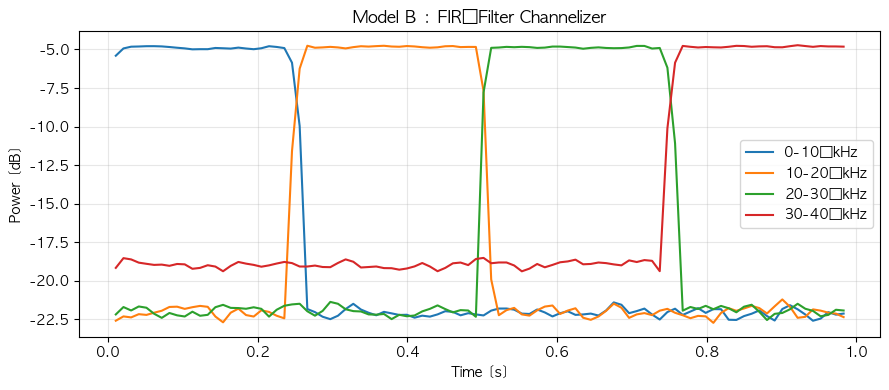

In [16]:
import numpy as np, matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# (동일 시그널 x, fs, t, slots … 위 코드 그대로)

# ── FIR 필터 설계 (Hamming, 401tap) ───────
bands = np.array([0,10e3,20e3,30e3,40e3])
numtaps = 401; nfft, no = 2048, 1024
pwr_B = []

for i in range(len(bands)-1):
    lo, hi = bands[i], bands[i+1]
    if i == 0:         # Low‑pass
        taps = firwin(numtaps, hi, fs=fs, pass_zero=True)
    elif i == len(bands)-2:  # High‑pass
        taps = firwin(numtaps, lo, fs=fs, pass_zero=False)
    else:              # Band‑pass
        taps = firwin(numtaps, [lo, hi], fs=fs, pass_zero=False)

    y = lfilter(taps, 1.0, x)
    step = nfft - no
    seg_pow = [np.mean(y[k:k+nfft]**2) for k in range(0, len(y)-nfft+1, step)]
    pwr_B.append(10*np.log10(np.array(seg_pow)+1e-12))

# ── 플롯 ───────────────────────────────
t_bins = np.arange(len(pwr_B[0])) * step / fs + nfft/(2*fs)
plt.figure(figsize=(9,4))
for ch,p in enumerate(pwr_B):
    plt.plot(t_bins, p, label=f'{bands[ch]/1e3:.0f}-{bands[ch+1]/1e3:.0f} kHz')
plt.title('Model B : FIR‑Filter Channelizer'); plt.xlabel('Time [s]'); plt.ylabel('Power [dB]')
plt.grid(True, alpha=.3); plt.legend(); plt.tight_layout(); plt.show()


/opt/homebrew/Cellar/jupyterlab/4.3.2/libexec/lib/python3.13/site-packages/matplotlib/axes/_axes.py:8280: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/1181445265.py:71: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/1181445265.py:71: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/1181445265.py:71: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from f

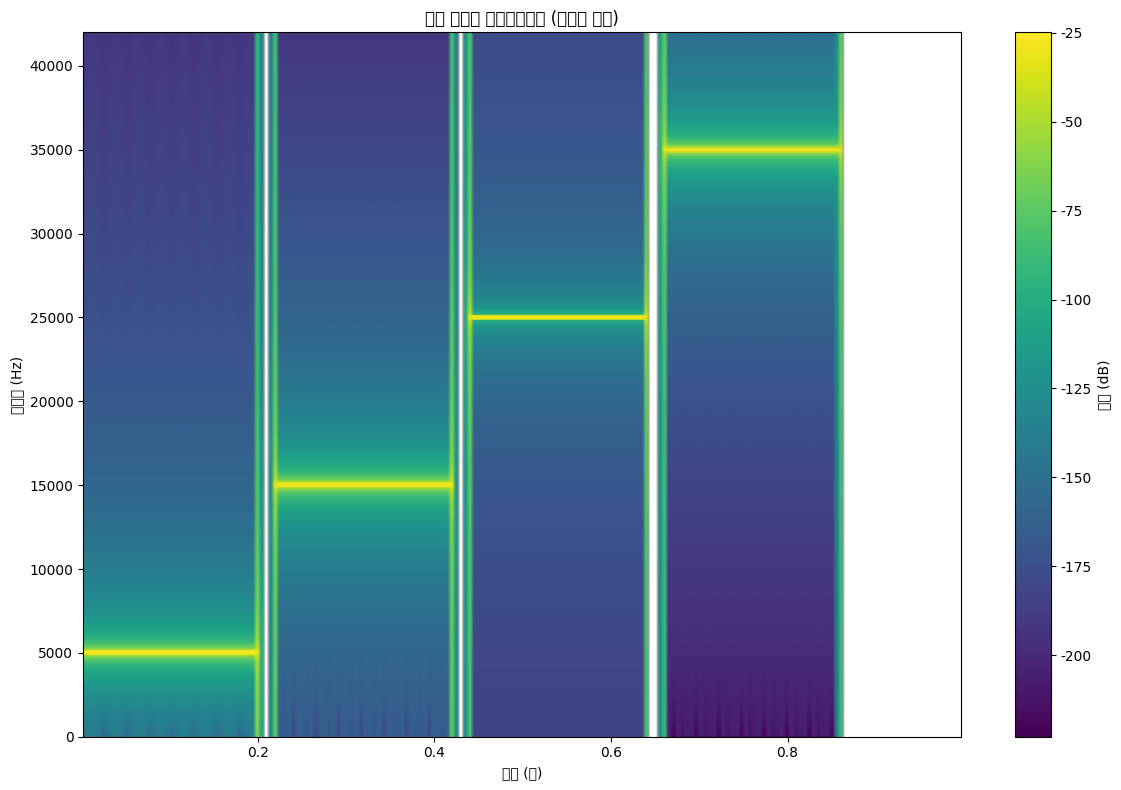

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/1181445265.py:91: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/1181445265.py:91: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
findfont: Font family 'Malgun Gothic' not found.
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/1181445265.py:91: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[

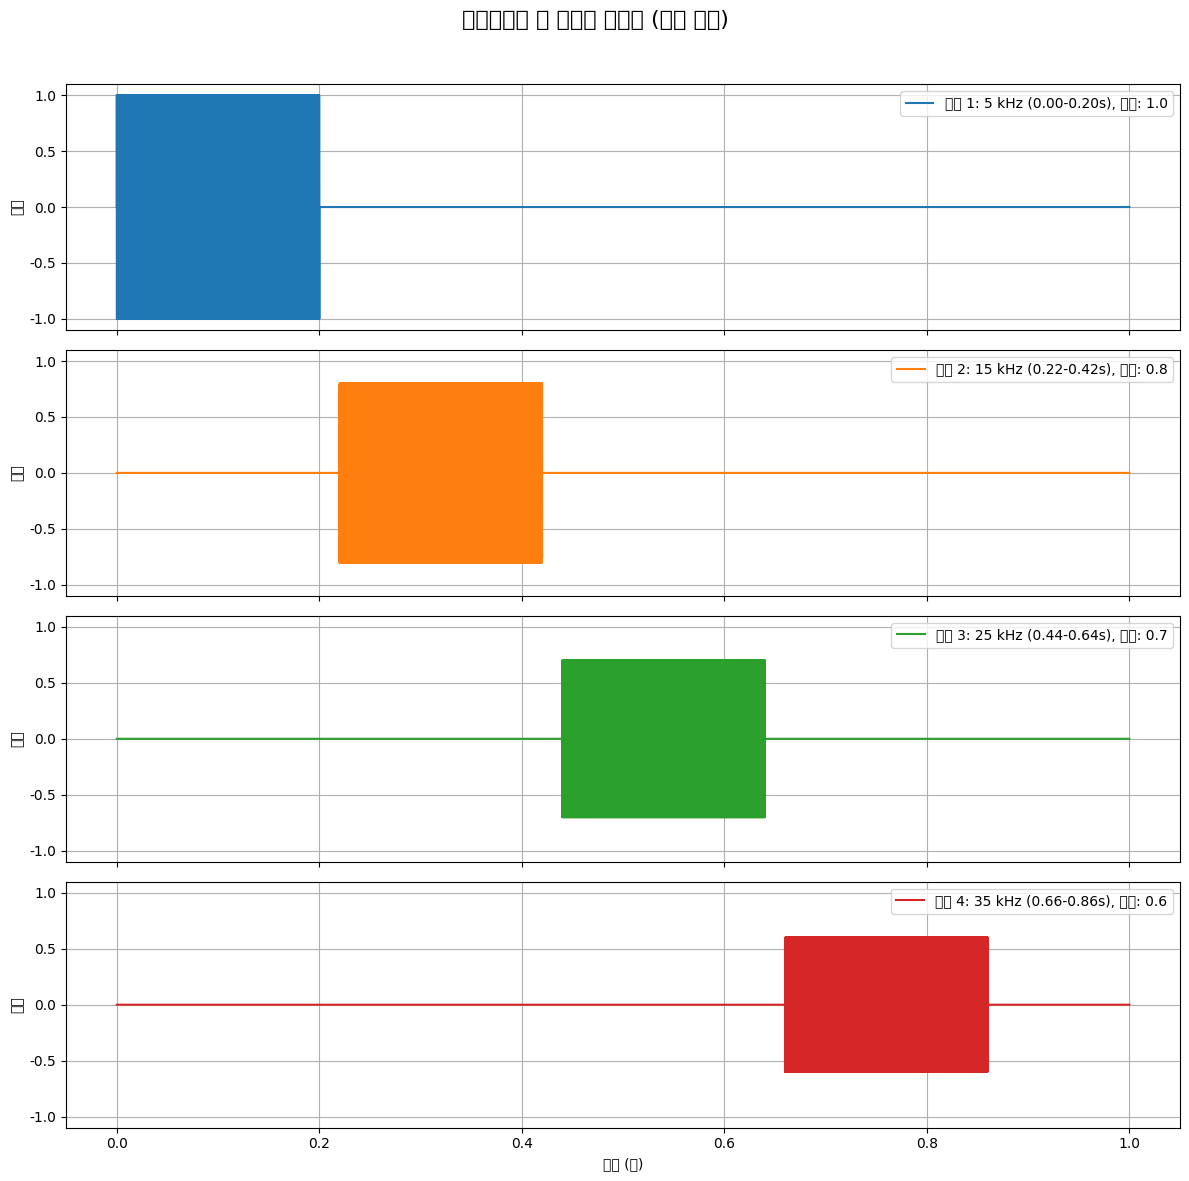

합성 신호의 스펙트로그램 및 각 채널별 시간 영역 플롯이 생성되었습니다.
spectrogram_combined_signal_ko.png 파일과 channelized_signals_time_domain_ko.png 파일로 저장되었습니다.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 예시, 다른 OS의 경우 경로 수정 필요)
# 사용자의 환경에 맞는 한글 폰트를 설정해주세요.
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except RuntimeError:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except RuntimeError:
        try:
            # Linux에서 나눔고딕 등을 사용하는 경우. 폰트 설치 필요.
            # fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf') # 시스템 경로에 따라 다름
            plt.rcParams['font.family'] = 'NanumGothic'
        except RuntimeError:
            print("한글 폰트를 찾을 수 없습니다. 기본 영문 폰트로 표시됩니다.")
            pass
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

# 시간 파라미터
sampling_rate = 100000  # 샘플링 주파수 (Hz)
duration = 1.0          # 신호 지속 시간 (초)
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False) # 시간 벡터

# 시간 게이팅된 사인파 생성 함수
def generate_gated_sine(time_vector, freq, amp, start_time, end_time, sampling_rate):
    sine_wave = amp * np.sin(2 * np.pi * freq * time_vector)
    window = np.zeros_like(time_vector)
    start_idx = max(0, int(start_time * sampling_rate))
    end_idx = min(len(time_vector), int(end_time * sampling_rate))
    if start_idx < end_idx:
        window[start_idx:end_idx] = 1.0
    return sine_wave * window

# 신호 파라미터 (주파수, 진폭, 시작/종료 시간) - 간격 포함
signals_params = [
    {'label': '5 kHz',  'freq': 5000,  'amp': 1.0, 'start': 0.0,  'end': 0.20},
    {'label': '15 kHz', 'freq': 15000, 'amp': 0.8, 'start': 0.22, 'end': 0.42},
    {'label': '25 kHz', 'freq': 25000, 'amp': 0.7, 'start': 0.44, 'end': 0.64},
    {'label': '35 kHz', 'freq': 35000, 'amp': 0.6, 'start': 0.66, 'end': 0.86}
]

# 개별 신호 및 합성 신호 생성
individual_signals = []
combined_signal = np.zeros_like(t)

for i, params in enumerate(signals_params):
    signal_i = generate_gated_sine(t, params['freq'], params['amp'],
                                   params['start'], params['end'], sampling_rate)
    individual_signals.append(signal_i)
    combined_signal += signal_i

# 1. 합성 신호의 스펙트로그램 플롯
plt.figure(figsize=(12, 8))
Pxx, freqs, bins, im = plt.specgram(combined_signal,
                                     NFFT=1024,             # FFT 계산에 사용될 샘플 수
                                     Fs=sampling_rate,      # 샘플링 주파수
                                     noverlap=512,          # FFT 블록 간 중첩 샘플 수
                                     cmap='viridis',        # 컬러맵
                                     scale='dB',            # dB 스케일로 표시
                                     mode='psd')           # Power Spectral Density

plt.ylim(0, max(s['freq'] for s in signals_params) * 1.2) # 주파수 범위 설정 (가장 높은 주파수보다 약간 높게)
plt.title('합성 신호의 스펙트로그램 (채널화 이전)')
plt.xlabel('시간 (초)')
plt.ylabel('주파수 (Hz)')
cbar = plt.colorbar(im) # im 객체를 colorbar에 전달
cbar.set_label('전력 (dB)')
plt.tight_layout()
plt.savefig("spectrogram_combined_signal_ko.png")
plt.show()

# 2. 채널라이저를 통해 분리된 각 채널의 시간 영역 플롯
fig_height = 3 * len(individual_signals)
fig, axs = plt.subplots(len(individual_signals), 1, figsize=(12, fig_height), sharex=True, sharey=True)
if len(individual_signals) == 1:
    axs = [axs]

fig.suptitle('채널라이저 후 분리된 신호들 (시간 영역)', fontsize=16)
for i, signal_i in enumerate(individual_signals):
    params = signals_params[i]
    axs[i].plot(t, signal_i, color=f'C{i}',
                label=f'채널 {i+1}: {params["label"]} ({params["start"]:.2f}-{params["end"]:.2f}s), 진폭: {params["amp"]}')
    axs[i].set_ylabel('진폭')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

axs[-1].set_xlabel('시간 (초)')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("channelized_signals_time_domain_ko.png")
plt.show()

print("합성 신호의 스펙트로그램 및 각 채널별 시간 영역 플롯이 생성되었습니다.")
print("spectrogram_combined_signal_ko.png 파일과 channelized_signals_time_domain_ko.png 파일로 저장되었습니다.")

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/320349755.py:90: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/320349755.py:90: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/320349755.py:90: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


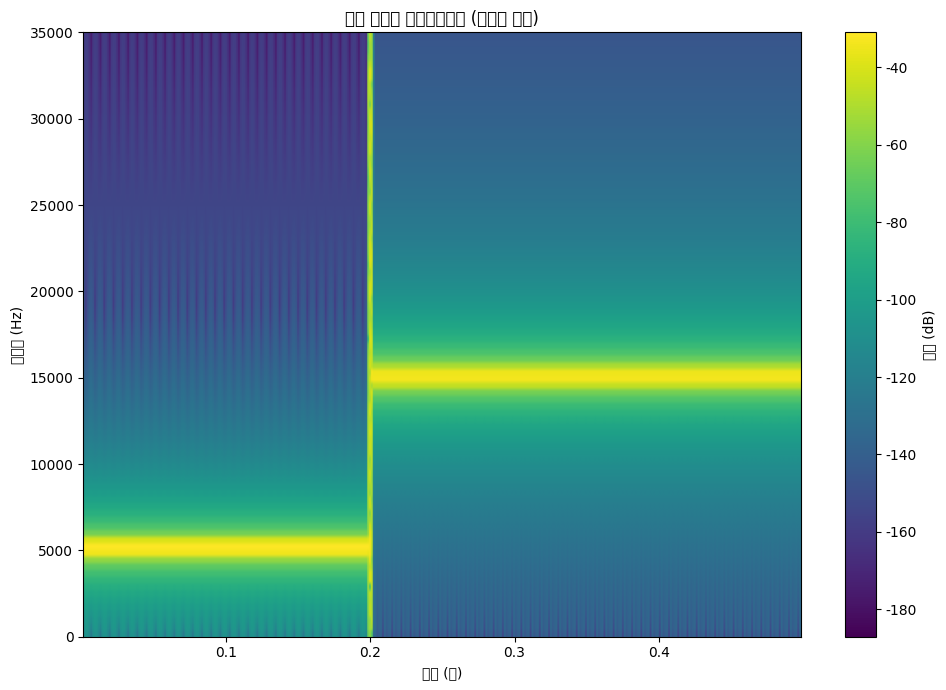

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/320349755.py:122: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/320349755.py:122: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
findfont: Font family 'Malgun Gothic' not found.
/var/folders/dd/2k5btsbd6g979yf06pmbn3nr0000gn/T/ipykernel_7429/320349755.py:122: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[

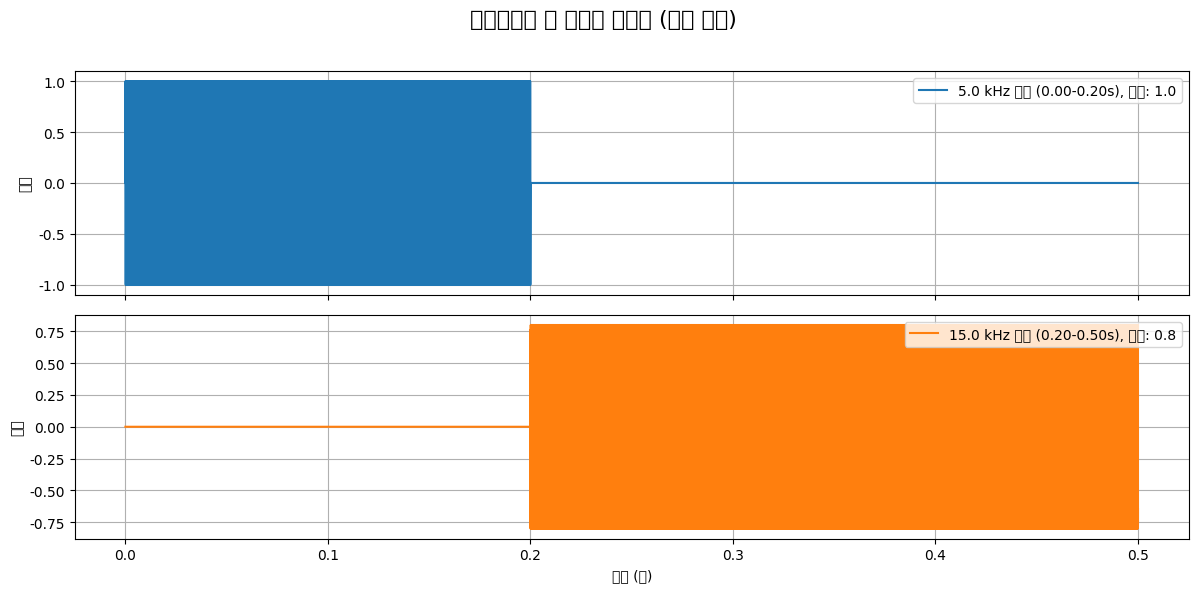

펄스를 포함한 합성 신호의 스펙트로그램 및 각 채널별 시간 영역 플롯이 생성되었습니다.
spectrogram_combined_signal_with_pulse_ko.png 파일과 channelized_signals_time_domain_with_pulse_ko.png 파일로 저장되었습니다.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
try:
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
except RuntimeError:
    try:
        plt.rcParams['font.family'] = 'AppleGothic' # macOS
    except RuntimeError:
        try:
            plt.rcParams['font.family'] = 'NanumGothic' # Linux
        except RuntimeError:
            print("한글 폰트를 찾을 수 없습니다. 기본 영문 폰트로 표시됩니다.")
            pass
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

# 시간 파라미터
sampling_rate = 100000  # 샘플링 주파수 (Hz)
duration = 0.5          # 신호 전체 지속 시간 (초)
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False) # 시간 벡터

# 시간 게이팅된 사인파 생성 함수
def generate_gated_sine(time_vector, freq, amp, start_time, end_time, sampling_rate_local):
    sine_wave = amp * np.sin(2 * np.pi * freq * time_vector)
    window = np.zeros_like(time_vector)
    start_idx = max(0, int(start_time * sampling_rate_local))
    end_idx = min(len(time_vector), int(end_time * sampling_rate_local))
    if start_idx < end_idx:
        window[start_idx:end_idx] = 1.0
    return sine_wave * window

# 신호 파라미터 정의
signal_A_freq = 5000
signal_A_amp = 1.0
signal_A_start = 0.0
signal_A_end = 0.2

signal_B_freq = 15000
signal_B_amp = 0.8
signal_B_start = 0.2 # B는 A가 끝난 직후 시작
signal_B_end = duration

pulse_time = 0.2
pulse_duration = 0.002 # 2ms 지속 시간의 펄스
pulse_amp = 2.5        # 펄스의 진폭 (다른 신호보다 강하게)

# 개별 신호 생성
signal_A = generate_gated_sine(t, signal_A_freq, signal_A_amp, signal_A_start, signal_A_end, sampling_rate)
signal_B = generate_gated_sine(t, signal_B_freq, signal_B_amp, signal_B_start, signal_B_end, sampling_rate)

# 펄스 신호 생성 (짧은 시간 동안의 광대역 노이즈)
pulse_signal = np.zeros_like(t)
pulse_start_idx = max(0, int((pulse_time - pulse_duration/2) * sampling_rate))
pulse_end_idx = min(len(t), int((pulse_time + pulse_duration/2) * sampling_rate))

if pulse_start_idx < pulse_end_idx:
    # 해당 구간에 랜덤 노이즈 추가
    pulse_segment_len = pulse_end_idx - pulse_start_idx
    pulse_signal[pulse_start_idx:pulse_end_idx] = (np.random.rand(pulse_segment_len) - 0.5) * 2 * pulse_amp

# 합성 신호
combined_signal = signal_A + signal_B + pulse_signal

# --- 플롯 생성 ---

# 1. 합성 신호의 스펙트로그램
plt.figure(figsize=(10, 7)) # 이미지 크기 조정
# NFFT 값을 조정하여 시간/주파수 해상도 조절 (펄스를 잘 보려면 NFFT를 작게)
# 펄스가 짧으므로 시간 해상도를 높이기 위해 NFFT를 줄입니다.
NFFT_val = 256
noverlap_val = NFFT_val // 2 # 보통 NFFT의 절반 정도

Pxx, freqs, bins, im = plt.specgram(combined_signal,
                                     NFFT=NFFT_val,
                                     Fs=sampling_rate,
                                     noverlap=noverlap_val,
                                     cmap='viridis',
                                     scale='dB',
                                     mode='psd')

# Y축 주파수 범위 설정 (관심 영역에 맞게, 예: 0 ~ 35kHz)
plt.ylim(0, 35000)
plt.title('합성 신호의 스펙트로그램 (채널화 이전)')
plt.xlabel('시간 (초)')
plt.ylabel('주파수 (Hz)')
cbar = plt.colorbar(im)
cbar.set_label('전력 (dB)')
plt.tight_layout()
plt.savefig("spectrogram_combined_signal_with_pulse_ko.png")
plt.show()

# 2. 채널라이저를 통해 분리된 각 주파수 채널의 시간 영역 플롯
# 여기서는 의도된 주요 주파수 성분(signal_A, signal_B)만 플롯합니다.
# 펄스는 광대역 성분이므로 특정 주파수 채널에 깨끗하게 분리되지 않을 수 있습니다.
individual_signals_for_plot = [
    {'signal': signal_A, 'label': f'{signal_A_freq/1000} kHz 채널', 'start': signal_A_start, 'end': signal_A_end, 'amp': signal_A_amp},
    {'signal': signal_B, 'label': f'{signal_B_freq/1000} kHz 채널', 'start': signal_B_start, 'end': signal_B_end, 'amp': signal_B_amp}
]

fig_height = 3 * len(individual_signals_for_plot)
fig, axs = plt.subplots(len(individual_signals_for_plot), 1, figsize=(12, fig_height), sharex=True, sharey=False) # sharey=False로 변경하여 각 y축 스케일 자동 조절
if len(individual_signals_for_plot) == 1:
    axs = [axs]

fig.suptitle('채널라이저 후 분리된 신호들 (시간 영역)', fontsize=16)
for i, sig_info in enumerate(individual_signals_for_plot):
    axs[i].plot(t, sig_info['signal'], color=f'C{i}',
                label=f'{sig_info["label"]} ({sig_info["start"]:.2f}-{sig_info["end"]:.2f}s), 진폭: {sig_info["amp"]}')
    axs[i].set_ylabel('진폭')
    # 각 채널별로 y축 범위 자동 설정
    # max_amp = np.max(np.abs(sig_info['signal']))
    # if max_amp > 0:
    #     axs[i].set_ylim(-max_amp*1.1, max_amp*1.1)
    # else:
    #     axs[i].set_ylim(-1, 1) # 신호가 없을 경우 기본 범위
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

axs[-1].set_xlabel('시간 (초)')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("channelized_signals_time_domain_with_pulse_ko.png")
plt.show()

print("펄스를 포함한 합성 신호의 스펙트로그램 및 각 채널별 시간 영역 플롯이 생성되었습니다.")
print("spectrogram_combined_signal_with_pulse_ko.png 파일과 channelized_signals_time_domain_with_pulse_ko.png 파일로 저장되었습니다.")

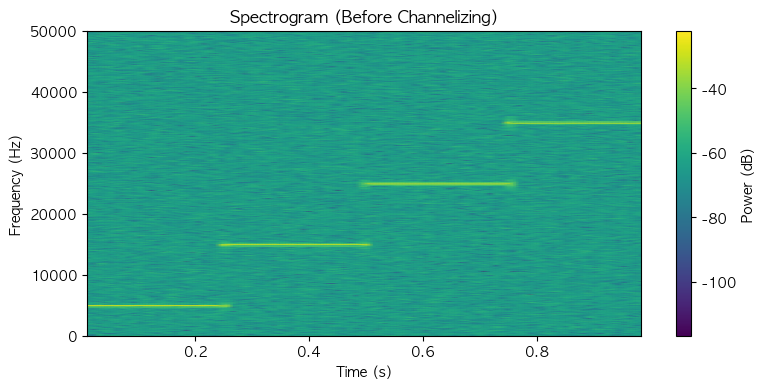

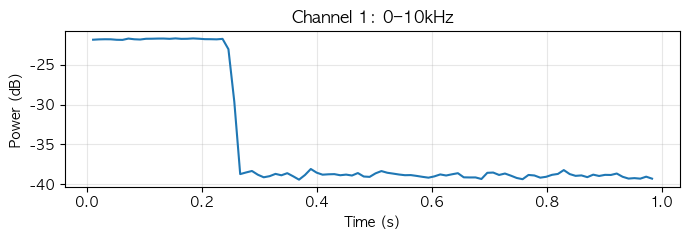

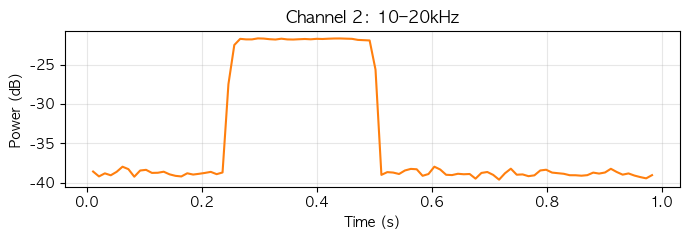

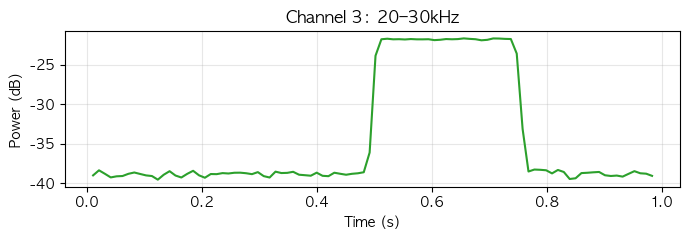

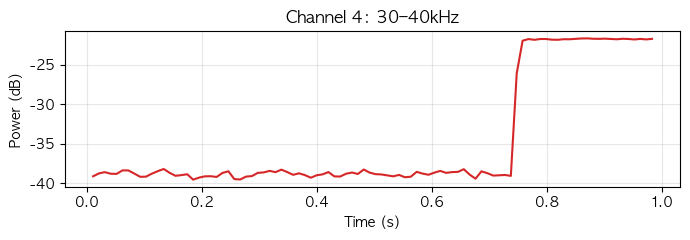

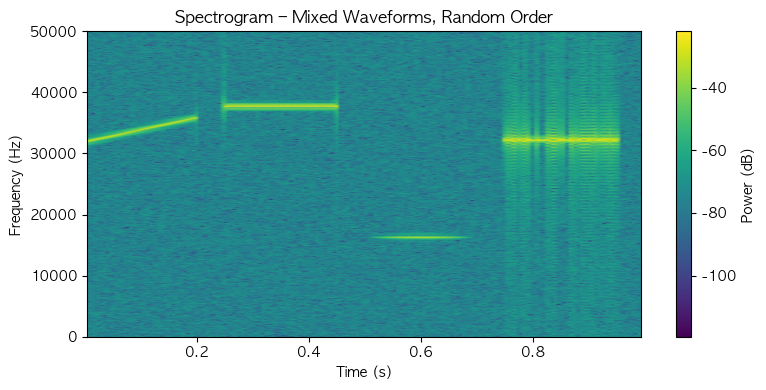

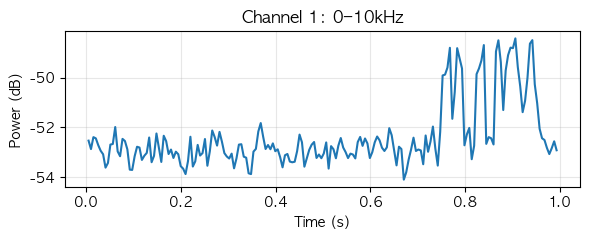

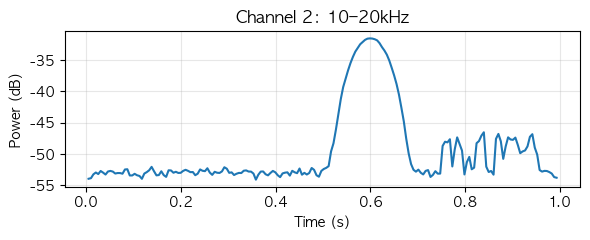

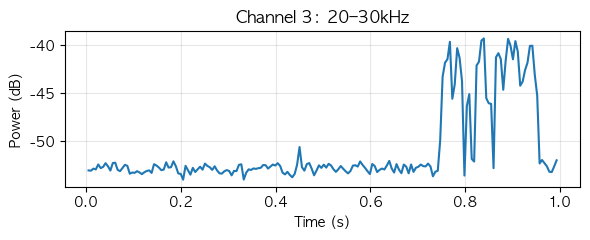

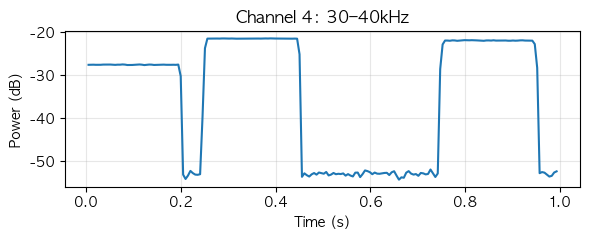

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, firwin, lfilter

# --------------------------------------------------------------------
# 1. Parameters
# --------------------------------------------------------------------
fs = 100_000           # 100 kHz sampling rate
duration = 1.0         # 1 second
t = np.arange(0, duration, 1 / fs)

# Four waveform types to mix
wave_types = ['sine', 'tapered', 'chirp', 'bpsk']

# Random shuffle of waveforms, center frequencies, and amplitudes
rng = np.random.default_rng(seed=2025)

# Choose 4 random center frequencies between 3 kHz–38 kHz (ensure <= fs/2)
center_freqs = rng.uniform(3_000, 38_000, size=4)

# Random amplitudes for contrast
amplitudes = rng.uniform(0.3, 1.2, size=4)

# Shuffle assignment order for time slots
order = rng.permutation(4)

slot_len = duration / 4  # 0.25 s per slot
events = []

for idx, slot_id in enumerate(order):
    start = idx * slot_len
    end = start + slot_len * 0.8  # 80 % active
    f0 = center_freqs[slot_id]
    amp = amplitudes[slot_id]
    wtype = wave_types[slot_id]
    events.append((start, end, f0, amp, wtype))

# --------------------------------------------------------------------
# 2. Build composite signal
# --------------------------------------------------------------------
x = np.zeros_like(t)

for start, end, f0, amp, wtype in events:
    idx_mask = (t >= start) & (t < end)
    tt = t[idx_mask] - start
    dur = end - start
    phase0 = 2 * np.pi * rng.random()

    if wtype == 'sine':
        x[idx_mask] += amp * np.cos(2 * np.pi * f0 * tt + phase0)

    elif wtype == 'tapered':
        envelope = np.sin(np.pi * tt / dur) ** 2
        x[idx_mask] += amp * envelope * np.cos(2 * np.pi * f0 * tt + phase0)

    elif wtype == 'chirp':
        k = 4000 / dur  # sweep ±2 kHz
        inst_phase = 2 * np.pi * (f0 * tt + 0.5 * k * tt ** 2)
        x[idx_mask] += amp * np.cos(inst_phase + phase0)

    elif wtype == 'bpsk':
        sym_rate = 500  # symbols/s
        sym_samp = int(fs / sym_rate)
        num_sym = int(np.ceil(tt.size / sym_samp))
        bits = rng.choice([-1, 1], size=num_sym)
        bpsk_seq = np.repeat(bits, sym_samp)[:tt.size]
        carrier = np.cos(2 * np.pi * f0 * tt + phase0)
        x[idx_mask] += amp * bpsk_seq * carrier

# Add white Gaussian noise (small)
x += 0.05 * rng.normal(size=x.size)

# --------------------------------------------------------------------
# 3. Spectrogram (before channelizing)
# --------------------------------------------------------------------
nfft = 1024
noverlap = nfft // 2
freq_bins, time_bins, Sxx = spectrogram(x, fs=fs, nperseg=nfft, noverlap=noverlap)

plt.figure(figsize=(8, 4))
plt.pcolormesh(time_bins, freq_bins, 10 * np.log10(Sxx + 1e-12), shading='gouraud')
plt.title("Spectrogram – Mixed Waveforms, Random Order")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Power (dB)")
plt.tight_layout()
plt.show()

# --------------------------------------------------------------------
# 4. Simple FFT-bin channelizer (4 bands: 0–10,10–20,20–30,30–40 kHz)
# --------------------------------------------------------------------
band_edges = np.array([0, 10_000, 20_000, 30_000, 40_000])
num_ch = len(band_edges) - 1
ch_power = []

for ch in range(num_ch):
    mask = (freq_bins >= band_edges[ch]) & (freq_bins < band_edges[ch + 1])
    pwr = np.sum(Sxx[mask, :], axis=0)
    ch_power.append(10 * np.log10(pwr + 1e-12))

# --------------------------------------------------------------------
# 5. Plot channel power (separate figures)
# --------------------------------------------------------------------
for ch in range(num_ch):
    plt.figure(figsize=(6, 2.5))
    plt.plot(time_bins, ch_power[ch])
    plt.xlabel("Time (s)")
    plt.ylabel("Power (dB)")
    plt.title(f"Channel {ch+1}: {band_edges[ch]/1e3:.0f}–{band_edges[ch+1]/1e3:.0f}kHz")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
